In [54]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
pd.set_option('max_rows', 500) 
pd.set_option('max_columns', 500) 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/mobile_dataset.csv')

In [9]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [16]:
def _info(df):
    print(df.shape)
    print('###'*17)
    print(df.info())
    print('###'*17)
    print(df.describe())
    print('###'*17)
    print(df.isna().sum())

In [17]:
_info(df)

(2000, 21)
###################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   in

### Univariate selection

In [18]:
X = df.drop('price_range',axis=1)
y = df.price_range

In [24]:
display(X.head())
display(y.head())
display(y.value_counts())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [22]:
from sklearn.feature_selection import SelectKBest, chi2

### Apply SelectKBest Algorithm

In [25]:
ordered_rank_features = SelectKBest(score_func=chi2, k=20)
ordered_features = ordered_rank_features.fit(X,y)

In [27]:
ordered_features.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [36]:
df_scores = pd.DataFrame(ordered_features.scores_, columns=['Score'])

In [37]:
df_col = pd.DataFrame(X.columns, columns=['Features'])

In [38]:
futeres_rank = pd.concat([df_col, df_scores],axis=1)

In [42]:
futeres_rank.sort_values('Score', ascending=False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [44]:
futeres_rank.nlargest(10, 'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


### Feature importance
this technique give you a score for each feature of your data, the higher the score more relevant it is

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [48]:
print(model.feature_importances_)

[0.06141401 0.0199073  0.03342928 0.02050832 0.03246926 0.01845302
 0.03545721 0.03446627 0.03691315 0.03355772 0.0335903  0.04647861
 0.04802059 0.38641604 0.03448572 0.0348656  0.03468175 0.01454989
 0.01985379 0.02048217]


In [49]:
rank_feature = pd.Series(model.feature_importances_, index=X.columns)

In [52]:
rank_feature.sort_values(ascending=False)

ram              0.386416
battery_power    0.061414
px_width         0.048021
px_height        0.046479
mobile_wt        0.036913
int_memory       0.035457
sc_w             0.034866
talk_time        0.034682
sc_h             0.034486
m_dep            0.034466
pc               0.033590
n_cores          0.033558
clock_speed      0.033429
fc               0.032469
dual_sim         0.020508
wifi             0.020482
blue             0.019907
touch_screen     0.019854
four_g           0.018453
three_g          0.014550
dtype: float64

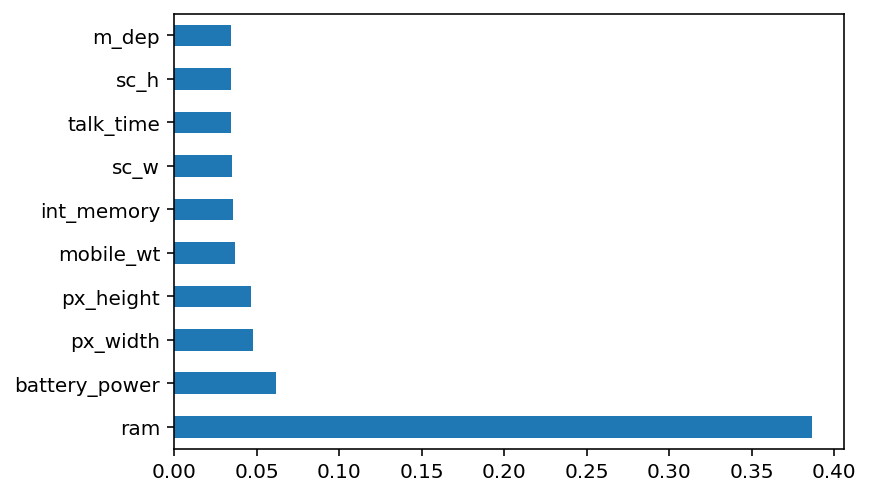

In [56]:
rank_feature.nlargest(10).plot(kind='barh');

### Correlation

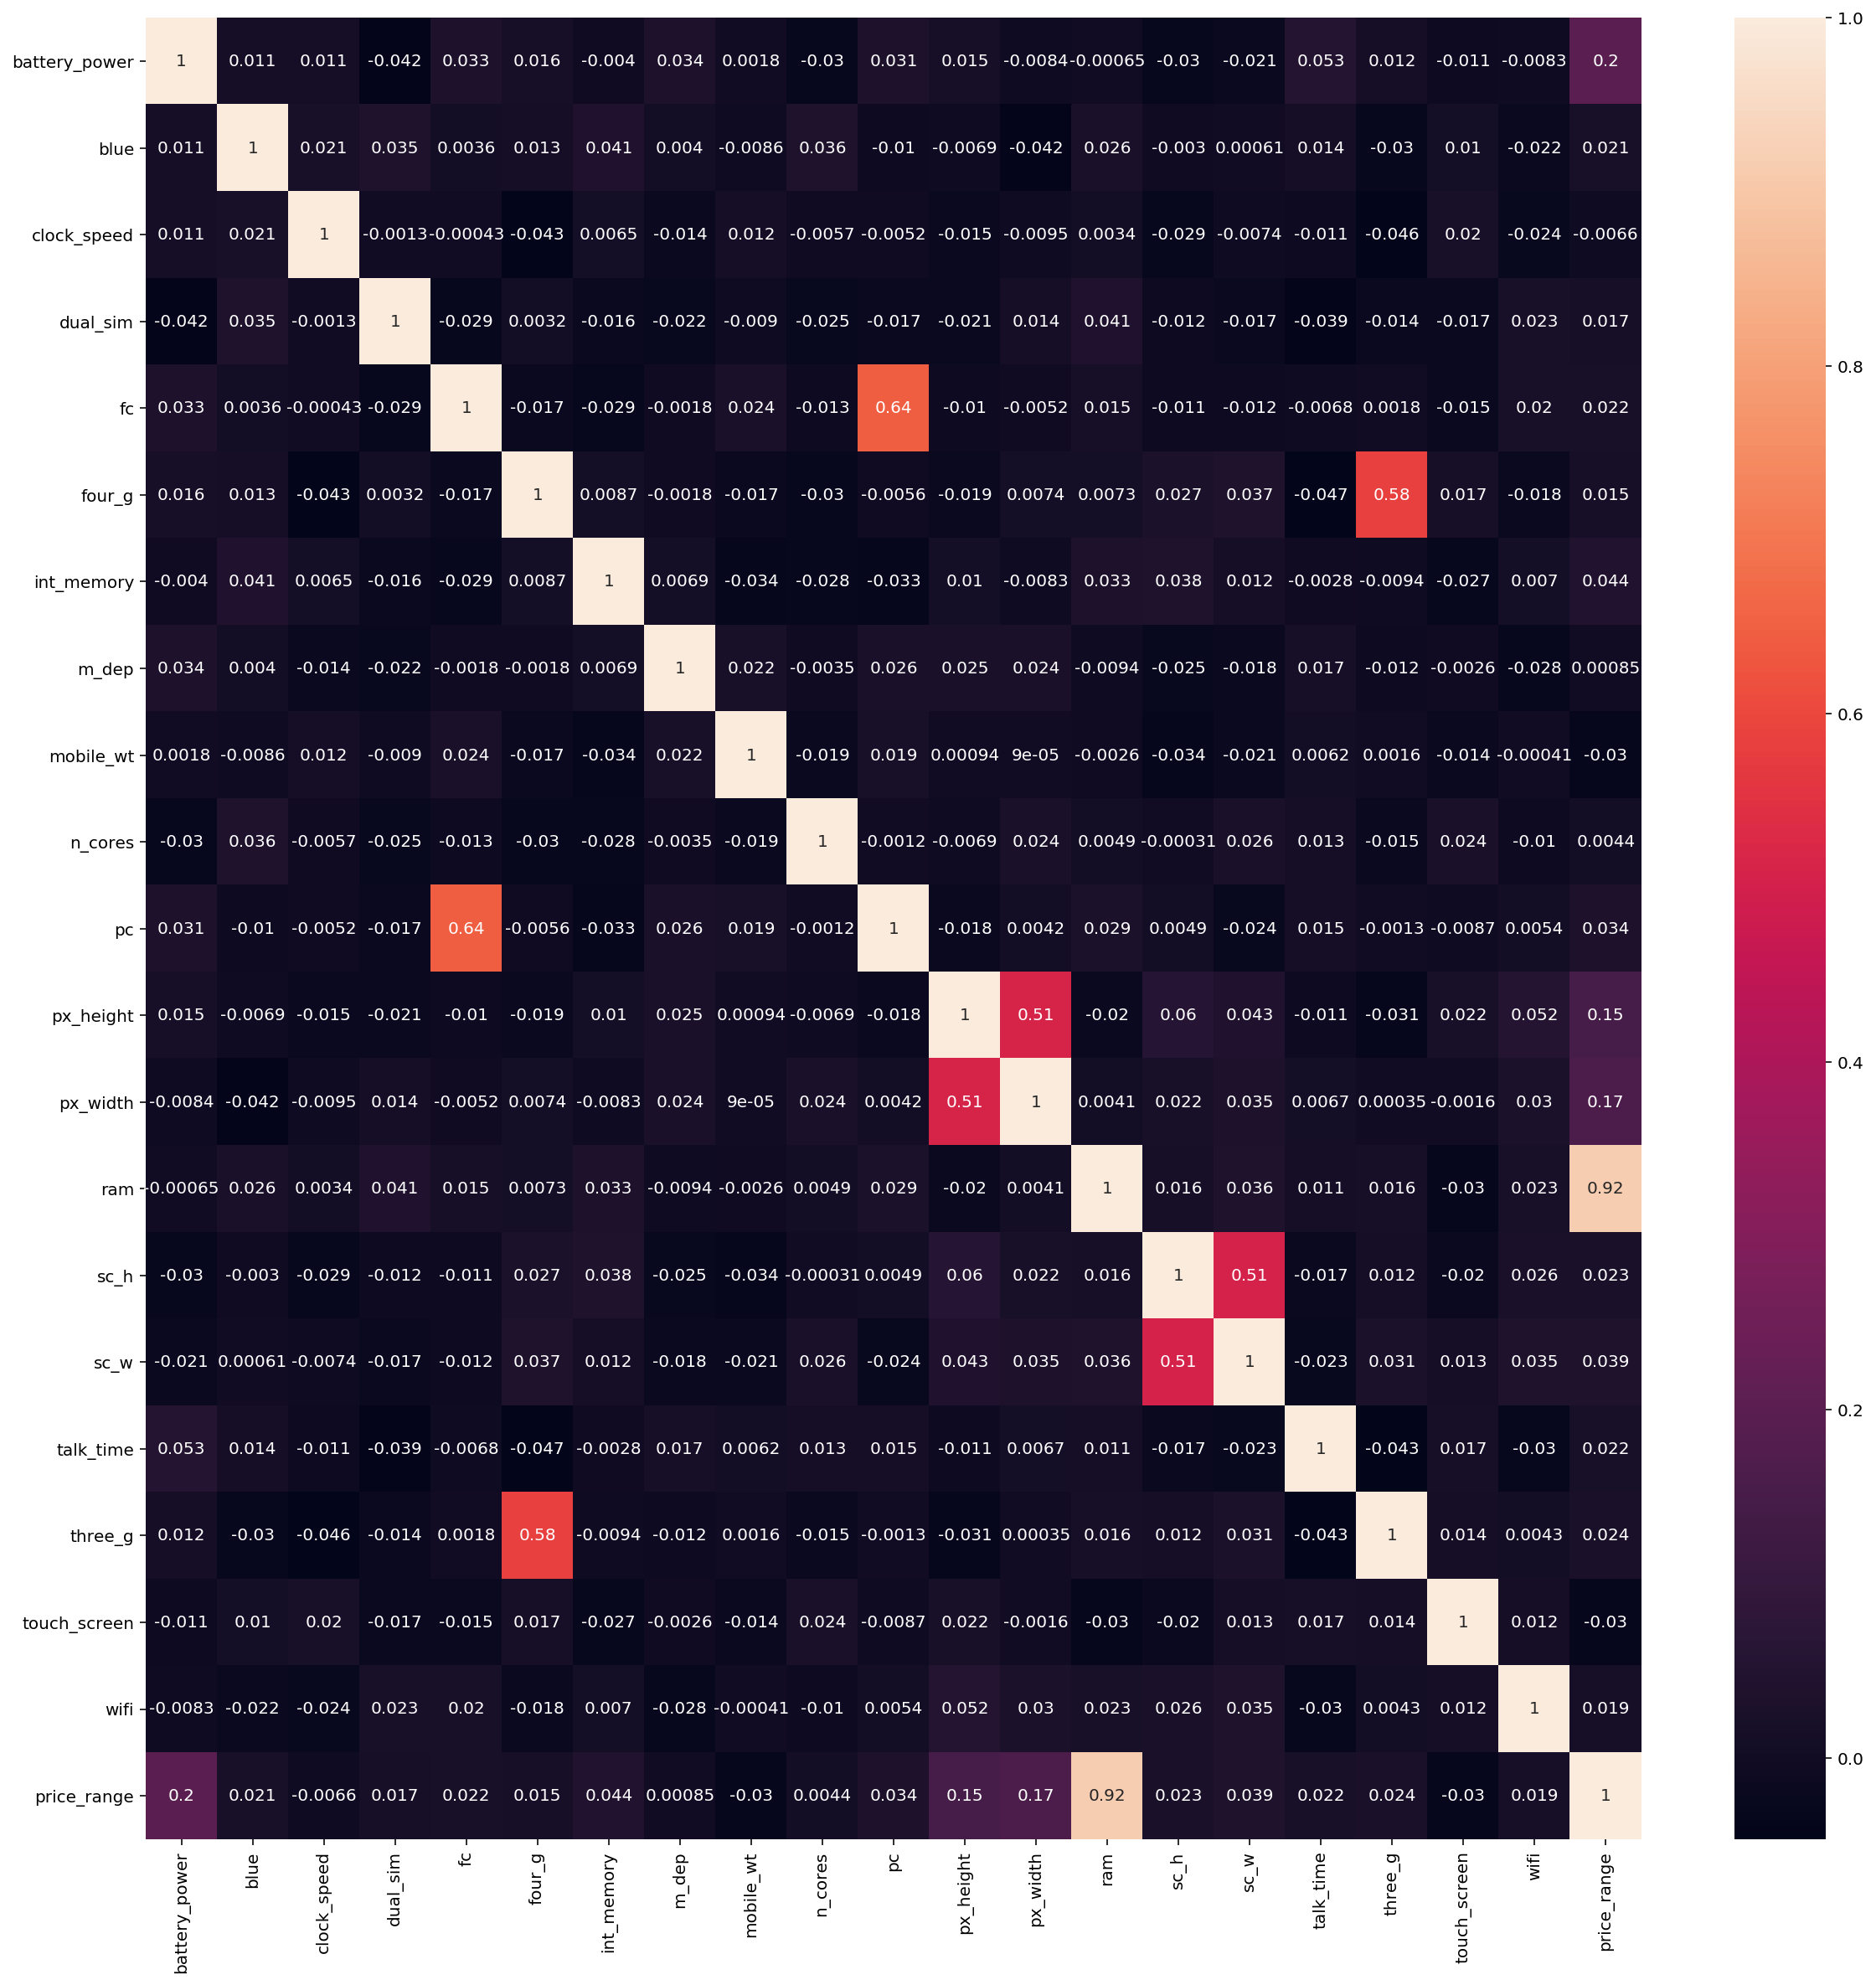

In [57]:
corr = df.corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)
plt.show()

### Remove the correlated

In [59]:
threshold = 0.8

In [60]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [61]:
correlation(df.iloc[:,:-1],threshold)

set()

### Information Gain

In [62]:
from sklearn.feature_selection import mutual_info_classif

In [63]:
mutual_info=mutual_info_classif(X,y)

In [64]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

ram              0.847502
sc_h             0.037472
battery_power    0.030909
px_height        0.028852
px_width         0.026023
three_g          0.018773
mobile_wt        0.016618
wifi             0.010694
pc               0.007471
int_memory       0.007226
talk_time        0.000775
sc_w             0.000000
touch_screen     0.000000
m_dep            0.000000
four_g           0.000000
fc               0.000000
dual_sim         0.000000
clock_speed      0.000000
blue             0.000000
n_cores          0.000000
dtype: float64

In [ ]:
pass